<a href="https://colab.research.google.com/github/danielamll/PIA_RED_NEURONALES/blob/main/PIAREDESEFFICIENT11epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALACIÓN DE KAGGLE Y DESCARGA DE DATASET

In [ ]:
#Información de la gpu que se usa para correr la red neuronal
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu May 19 16:13:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           8318       1090  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23            784         34  0.9411765        
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           5575        140  1.0              
muratkokludataset/rice-image-dataset         

In [ ]:
! kaggle datasets download "aryashah2k/breast-ultrasound-images-dataset" --force

 97% 190M/195M [00:04<00:00, 49.7MB/s]
100% 195M/195M [00:04<00:00, 43.7MB/s]


In [ ]:
! unzip 'breast-ultrasound-images-dataset'

Archive:  breast-ultrasound-images-dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: Data

# IMPORTAR LIBRERIAS


In [ ]:
import numpy as np
import pandas as pd
import os, glob

In [ ]:

from tensorflow import keras
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import layers, activations, optimizers, losses, metrics, initializers
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV3Small, MobileNet, InceptionV3, EfficientNetB7
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split

In [ ]:
seed = 42 #random seed para siempre tener las mismas imagenes divididas al azar manteniendo los mismos sets (referencia a hitchhikers guide to the universe)
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
dir_path = r'/content/Dataset_BUSI_with_GT'
IMAGE_SHAPE = (244, 244)

In [ ]:
def prepare_image(file):
    img = image.load_img(file, target_size=IMAGE_SHAPE)
    img_array = image.img_to_array(img)
    return tf.keras.applications.efficientnet.preprocess_input (img_array)


In [ ]:
directories = os.listdir(dir_path) #funión para lectura de los documentos dentro de todos los folders

files = [] # lista para guardar las imagenes 
labels = [] # lista para guardar las etiquetas las cuales corresopnden al folder de donde vienen

In [ ]:
for folder in directories:
    
    fileList = glob.glob(dir_path + '/'+ folder + '/*')
    labels.extend([folder for l in fileList])
    files.extend(fileList)
pruebali = [labels[:5]]
pruebalf = [labels[-5:]]
print(pruebali)
print(pruebalf)
prueba = [files[:5]]
print(prueba)

len(files), len(labels)

[['malignant', 'malignant', 'malignant', 'malignant', 'malignant']]
[['benign', 'benign', 'benign', 'benign', 'benign']]
[['/content/Dataset_BUSI_with_GT/malignant/malignant (172)_mask.png', '/content/Dataset_BUSI_with_GT/malignant/malignant (112).png', '/content/Dataset_BUSI_with_GT/malignant/malignant (207)_mask.png', '/content/Dataset_BUSI_with_GT/malignant/malignant (137)_mask.png', '/content/Dataset_BUSI_with_GT/malignant/malignant (155)_mask.png']]


(1578, 1578)

In [ ]:
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if '_mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)
#eliminar las máscaraspara trabajar únicamente con las imágenes 
    
len(selected_files), len(selected_labels)

(780, 780)

In [ ]:
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if 'mask' not in file:
        selected_files.append(file)
        selected_labels.append(label) #guardar nuevo est sin máscaras

    
len(selected_files), len(selected_labels)

(780, 780)

In [ ]:
#crear diccionario para imagen y su etiqueta (objeto y su llave)
images = {'image': [], 'target': []}

for i, (file, label) in enumerate(zip(files, labels)):
    images['image'].append(prepare_image(file))
    images['target'].append(label)

preparing the image...
finished


In [ ]:
#convertir las listas en un numpyarray para poder trabajar con ellas para la división de set de entrenamiento y set de prueba
images['image'] = np.array(images['image'])
images['target'] = np.array(images['target'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

images['target'] = le.fit_transform(images['target'])

classes = le.classes_
print(f'the target classes are: {classes}')

x_train, x_test, y_train, y_test = train_test_split(images['image'], images['target'], test_size = .25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


the target classes are: ['benign' 'malignant' 'normal']
(1183, 244, 244, 3) (395, 244, 244, 3) (1183,) (395,)


# CONSTRUCCION DE CNN MODELO EFICIENTENETB7

In [ ]:
base_model = EfficientNetB7(include_top = False, weights = 'imagenet', input_shape = (*IMAGE_SHAPE, 3), classes = 3)

base_model.trainable = False #Evitar cambios en el model base, congelar los pesos de las capas
x = base_model.output

258088960/258076736 [==============================] - 2s 0us/step


In [ ]:
#Capas de convolución
x = layers.Conv2D(256, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)


ValueError: ignored

In [ ]:
#Capas completamente conectadas
x = layers.Flatten()(x) 
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('sigmoid')(x)
x = layers.Dropout(.2)(x)

x = layers.Dense(3, 'softmax')(x)

incept_model = keras.models.Model(inputs = base_model.input, outputs = x)

#Compilación del modelo
incept_model.compile(optimizer=optimizers.RMSprop(.001), loss = losses.sparse_categorical_crossentropy, metrics= [metrics.SparseCategoricalAccuracy()])

print(incept_model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 244, 244, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 244, 244, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 245, 245, 3)  0           ['normalization[0][0]']    

# ENTRENAR Y EVALUAR EL MODELO

In [ ]:
earlyStop = keras.callbacks.EarlyStopping(patience=60) 
best_model = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True) 

with tf.device('/cpu:0'):
    history = incept_model.fit(x_train, y_train, batch_size=32, epochs=11, validation_data=(x_test, y_test), callbacks=[earlyStop, best_model]) 

hist = history.history

plt.plot(hist['loss'], label=  'loss')
plt.plot(hist['val_loss'], label = 'val_loss')
plt.plot(hist['sparse_categorical_accuracy'], label='accuracy')
plt.plot(hist['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.legend()

incept_model.evaluate(x=x_test, y = y_test, batch_size=32, verbose=1)


Epoch 1/11
37/37 [==============================] - 652s 17s/step - loss: 1.0504 - sparse_categorical_accuracy: 0.5013 - val_loss: 0.9616 - val_sparse_categorical_accuracy: 0.5519
Epoch 2/11
37/37 [==============================] - 663s 18s/step - loss: 0.5819 - sparse_categorical_accuracy: 0.8183 - val_loss: 0.9221 - val_sparse_categorical_accuracy: 0.5519
Epoch 3/11
14/37 [==========>...................] - ETA: 5:06 - loss: 0.4271 - sparse_categorical_accuracy: 0.8862

KeyboardInterrupt: ignored

Se puede observar una caida en las epocas, una solución es cambiar la función de activación de alguna capa densa
RECORDAR PROBAR
OTRA FORMA DE ARREGLAR ESTO ES REDURCIR LA TASA DE APRENDIZAJE MIENTRAS AUMENTEN LAS CAPAS

https://stats.stackexchange.com/questions/362619/why-the-accuracy-of-my-neural-network-is-falling-when-epoch-increases

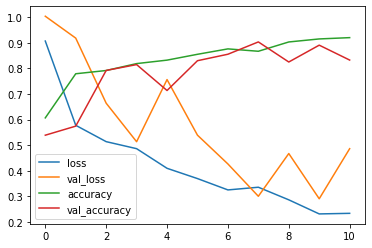

In [ ]:
hist = history.history

plt.plot(hist['loss'], label=  'loss')
plt.plot(hist['val_loss'], label = 'val_loss')
plt.plot(hist['sparse_categorical_accuracy'], label='accuracy')
plt.plot(hist['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.legend()